## HolidayCheck Case Study - Suraj Gurav

In [187]:
import pandas as pd
import numpy as np
import json
import requests
from datetime import date, timedelta
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

#### Question 1: Extract information about Justin Trudeau using Guardian Media Group API

Following cell extracts all the articles about Justin Trudeau and stores it into a dataframe


(Before running this Notebook, save your API KEY in the file guardian_credentials.txt and store this file in the current working directory)

In [2]:
MY_API_KEY = open("guardian_credentials.txt").read().strip()
API_ENDPOINT = "https://content.guardianapis.com/search?q=Justin%20AND%20Trudeau&from-date=2018-01-01&to-date=2023-06-28&show-fields=all&page-size=200&pages=10&query-fields=body,thumbnail&api-key="+MY_API_KEY

# Columns to be included in this study
contentId = []
contentType = []
sectionId = []
sectionName = []
webPublicationDate = []
pillarId = []
pillarName = []

headline = []
byline = []
wordcount = []
isPremoderated = []
productionOffice = []
publication = []
shouldHideAdverts = []
legallySensitive = []
lang = []
isLive = []
showAffiliateLinks = []

# Access the content
resp = requests.get(API_ENDPOINT)
data = resp.json()

total_pages = data['response']['pages']
for page in range(1,total_pages+1):
    all_results = []
    print(f"...page {page}")
    currentPage_API_ENDPOINT = API_ENDPOINT+"&page="+str(page)
    resp = requests.get(currentPage_API_ENDPOINT)
    data = resp.json()
    if data['response']['status'] == 'ok':
        all_results.extend(data['response']['results'])
    else: 
        continue

    # Extract data from each page
    print(f"Total articles on page {page}: {len(data['response']['results'])}\nData extraction started...")
    for result in all_results:
        field = result.get('fields')
        if "Justin Trudeau" in field.get('body'):
            # If "Justin Trudeau" is present in the 'body' of the post, then only we count that article
            contentId.append(result.get('id'))
            contentType.append(result.get('type'))
            sectionId.append(result.get('sectionId'))
            sectionName.append(result.get('sectionName'))
            webPublicationDate.append(result.get('webPublicationDate'))
            pillarId.append(result.get('pillarId'))
            pillarName.append(result.get('pillarName'))

            headline.append(field.get('headline'))
            byline.append(field.get('byline'))
            wordcount.append(field.get('wordcount'))
            isPremoderated.append(field.get('isPremoderated'))
            productionOffice.append(field.get('productionOffice'))
            publication.append(field.get('publication'))
            shouldHideAdverts.append(field.get('shouldHideAdverts'))
            legallySensitive.append(field.get('legallySensitive'))
            lang.append(field.get('lang'))
            isLive.append(field.get('isLive'))
            showAffiliateLinks.append(field.get('showAffiliateLinks'))
        else:
            continue

# Create a key-value structure of column name and its content
datadict = {'contentId':contentId,
            'contentType':contentType,
            'sectionId':sectionId,
            'sectionName':sectionName,
            'webPublicationDate':webPublicationDate,
            'pillarId':pillarId,
            'pillarName':pillarName,
            'headline':headline,
            'byline':byline,
            'wordcount':wordcount,
            'language':lang,
            'productionOffice':productionOffice,
            'publication':publication,
            'shouldHideAdverts':shouldHideAdverts,
            'legallySensitive':legallySensitive,
            'isPremoderated':isPremoderated,
            'isLive':isLive,
            'showAffiliateLinks':showAffiliateLinks,}

# Create dataframe
df = pd.DataFrame(datadict)
print("DataFrame created!")

...page 1
Total articles on page 1: 200
Data extraction started...
...page 2
Total articles on page 2: 200
Data extraction started...
...page 3
Total articles on page 3: 200
Data extraction started...
...page 4
Total articles on page 4: 200
Data extraction started...
...page 5
Total articles on page 5: 200
Data extraction started...
...page 6
Total articles on page 6: 200
Data extraction started...
...page 7
Total articles on page 7: 200
Data extraction started...
...page 8
DataFrame created!


In [3]:
df.head()

,contentId,contentType,sectionId,sectionName,webPublicationDate,pillarId,pillarName,headline,byline,wordcount,language,productionOffice,publication,shouldHideAdverts,legallySensitive,isPremoderated,isLive,showAffiliateLinks
0,world/2023/may/19/justin-trudeau-korea-wide-st...,article,world,World news,2023-05-19T17:11:18Z,pillar/news,News,Trudeau’s wide-stance pose with Korean politic...,Leyland Cecco in Toronto,392,en,US,The Guardian,false,false,false,true,false
1,world/2023/may/04/canada-china-ambassador-summ...,article,world,World news,2023-05-04T19:44:40Z,pillar/news,News,Canada summons Chinese ambassador after MP and...,Leyland Cecco in Toronto,508,en,US,theguardian.com,false,false,false,true,false
2,world/2023/may/08/canada-expels-chinese-diplom...,article,world,World news,2023-05-08T21:35:56Z,pillar/news,News,Canada expels Chinese diplomat for alleged int...,Leyland Cecco in Toronto and agencies,660,en,US,theguardian.com,false,false,false,true,false
3,world/2023/jun/09/canadian-official-investigat...,article,world,World news,2023-06-09T22:50:54Z,pillar/news,News,Canadian official investigating Chinese electi...,Leyland Cecco in Toronto,495,en,US,theguardian.com,false,false,false,true,false
4,world/2023/may/09/beijing-to-expel-canadian-co...,article,world,World news,2023-05-09T15:20:59Z,pillar/news,News,Canada won’t be intimidated by China’s retalia...,Helen Davidson in Taipei and Leyland Cecco in ...,618,en,US,theguardian.com,false,false,false,true,false


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   contentId           1335 non-null   object
 1   contentType         1335 non-null   object
 2   sectionId           1335 non-null   object
 3   sectionName         1335 non-null   object
 4   webPublicationDate  1335 non-null   object
 5   pillarId            1329 non-null   object
 6   pillarName          1329 non-null   object
 7   headline            1335 non-null   object
 8   byline              1323 non-null   object
 9   wordcount           1335 non-null   object
 10  language            1335 non-null   object
 11  productionOffice    1335 non-null   object
 12  publication         1335 non-null   object
 13  shouldHideAdverts   1335 non-null   object
 14  legallySensitive    1335 non-null   object
 15  isPremoderated      1335 non-null   object
 16  isLive              1335

In [108]:
df.contentType.value_counts()

article        1043
liveblog        291
interactive       1
Name: contentType, dtype: int64

In [109]:
# Keep only those records where content type is 'article'
df = df[df["contentType"]=='article'].copy()

In [110]:
# Correct column data types
df["webPublicationDate"] = pd.to_datetime(df["webPublicationDate"])
df["wordcount"] = df["wordcount"].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1334
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   contentId           1043 non-null   object             
 1   contentType         1043 non-null   object             
 2   sectionId           1043 non-null   object             
 3   sectionName         1043 non-null   object             
 4   webPublicationDate  1043 non-null   datetime64[ns, UTC]
 5   pillarId            1037 non-null   object             
 6   pillarName          1037 non-null   object             
 7   headline            1043 non-null   object             
 8   byline              1031 non-null   object             
 9   wordcount           1043 non-null   int32              
 10  language            1043 non-null   object             
 11  productionOffice    1043 non-null   object             
 12  publication         1043 non-null 

In [111]:
df.head()

,contentId,contentType,sectionId,sectionName,webPublicationDate,pillarId,pillarName,headline,byline,wordcount,...,legallySensitive,isPremoderated,isLive,showAffiliateLinks,year,month,day,Date,hour,monthName
0,world/2023/may/19/justin-trudeau-korea-wide-st...,article,world,World news,2023-05-19 17:11:18+00:00,pillar/news,News,Trudeau’s wide-stance pose with Korean politic...,Leyland Cecco in Toronto,392,...,false,false,true,false,2023,5,19,2023-05-19,17,May
1,world/2023/may/04/canada-china-ambassador-summ...,article,world,World news,2023-05-04 19:44:40+00:00,pillar/news,News,Canada summons Chinese ambassador after MP and...,Leyland Cecco in Toronto,508,...,false,false,true,false,2023,5,4,2023-05-04,19,May
2,world/2023/may/08/canada-expels-chinese-diplom...,article,world,World news,2023-05-08 21:35:56+00:00,pillar/news,News,Canada expels Chinese diplomat for alleged int...,Leyland Cecco in Toronto and agencies,660,...,false,false,true,false,2023,5,8,2023-05-08,21,May
3,world/2023/jun/09/canadian-official-investigat...,article,world,World news,2023-06-09 22:50:54+00:00,pillar/news,News,Canadian official investigating Chinese electi...,Leyland Cecco in Toronto,495,...,false,false,true,false,2023,6,9,2023-06-09,22,June
4,world/2023/may/09/beijing-to-expel-canadian-co...,article,world,World news,2023-05-09 15:20:59+00:00,pillar/news,News,Canada won’t be intimidated by China’s retalia...,Helen Davidson in Taipei and Leyland Cecco in ...,618,...,false,false,true,false,2023,5,9,2023-05-09,15,May


In [112]:
# Calculate other date related columns
df['year'] = df['webPublicationDate'].dt.year
df['month'] = df['webPublicationDate'].dt.month
df['monthName'] = df['webPublicationDate'].dt.month_name()
df['day'] = df['webPublicationDate'].dt.day
df['hour'] = df['webPublicationDate'].dt.hour
df['Date'] = df['webPublicationDate'].dt.date
df.head()

,contentId,contentType,sectionId,sectionName,webPublicationDate,pillarId,pillarName,headline,byline,wordcount,...,legallySensitive,isPremoderated,isLive,showAffiliateLinks,year,month,day,Date,hour,monthName
0,world/2023/may/19/justin-trudeau-korea-wide-st...,article,world,World news,2023-05-19 17:11:18+00:00,pillar/news,News,Trudeau’s wide-stance pose with Korean politic...,Leyland Cecco in Toronto,392,...,false,false,true,false,2023,5,19,2023-05-19,17,May
1,world/2023/may/04/canada-china-ambassador-summ...,article,world,World news,2023-05-04 19:44:40+00:00,pillar/news,News,Canada summons Chinese ambassador after MP and...,Leyland Cecco in Toronto,508,...,false,false,true,false,2023,5,4,2023-05-04,19,May
2,world/2023/may/08/canada-expels-chinese-diplom...,article,world,World news,2023-05-08 21:35:56+00:00,pillar/news,News,Canada expels Chinese diplomat for alleged int...,Leyland Cecco in Toronto and agencies,660,...,false,false,true,false,2023,5,8,2023-05-08,21,May
3,world/2023/jun/09/canadian-official-investigat...,article,world,World news,2023-06-09 22:50:54+00:00,pillar/news,News,Canadian official investigating Chinese electi...,Leyland Cecco in Toronto,495,...,false,false,true,false,2023,6,9,2023-06-09,22,June
4,world/2023/may/09/beijing-to-expel-canadian-co...,article,world,World news,2023-05-09 15:20:59+00:00,pillar/news,News,Canada won’t be intimidated by China’s retalia...,Helen Davidson in Taipei and Leyland Cecco in ...,618,...,false,false,true,false,2023,5,9,2023-05-09,15,May


In [113]:
# QC1: Check if any record is duplicated
# If output is non-zero, then investigate the duplicated records
df.contentId.duplicated().sum()

0

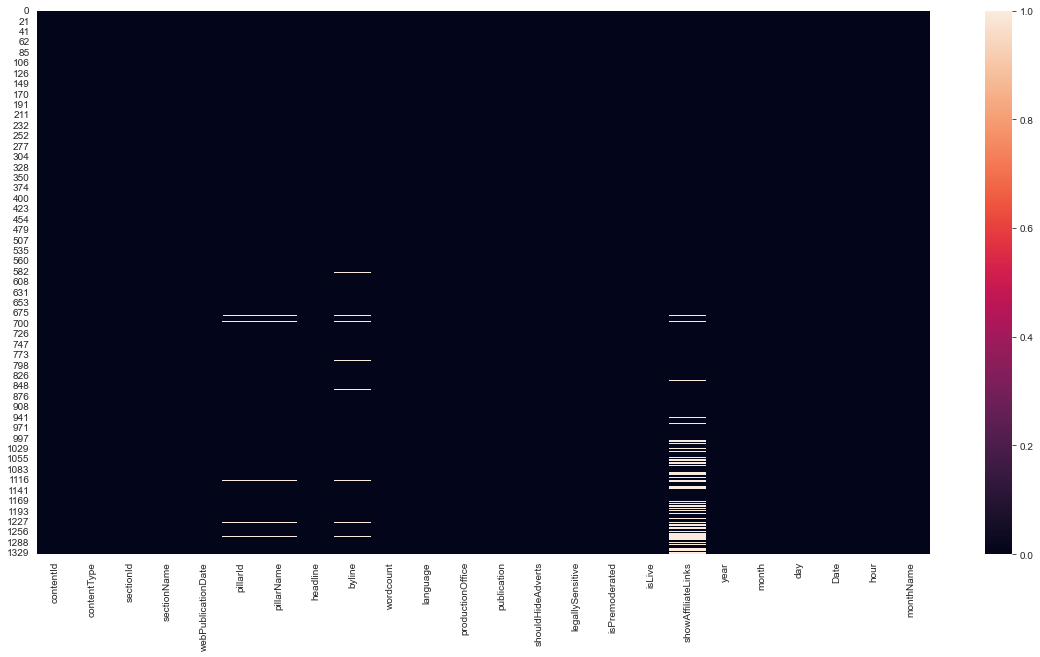

In [114]:
# QC2: Check if the dataset has any missing values
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.isna(), ax=ax)

There are a few missing values in the columns pillarId, pillarName, byline and showAffiliateLinks.
As of now we don't remove any records. If we don't need these columns in the future, we can drop these columns.

In [115]:
# QC3: Check if the data types are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1334
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   contentId           1043 non-null   object             
 1   contentType         1043 non-null   object             
 2   sectionId           1043 non-null   object             
 3   sectionName         1043 non-null   object             
 4   webPublicationDate  1043 non-null   datetime64[ns, UTC]
 5   pillarId            1037 non-null   object             
 6   pillarName          1037 non-null   object             
 7   headline            1043 non-null   object             
 8   byline              1031 non-null   object             
 9   wordcount           1043 non-null   int32              
 10  language            1043 non-null   object             
 11  productionOffice    1043 non-null   object             
 12  publication         1043 non-null 

Data type for the column Date should be Datetime and for the column wordcount should be int64

In [117]:
df["Date"] = pd.to_datetime(df["Date"])
df["wordcount"] = df["wordcount"].astype('int64')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1334
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   contentId           1043 non-null   object             
 1   contentType         1043 non-null   object             
 2   sectionId           1043 non-null   object             
 3   sectionName         1043 non-null   object             
 4   webPublicationDate  1043 non-null   datetime64[ns, UTC]
 5   pillarId            1037 non-null   object             
 6   pillarName          1037 non-null   object             
 7   headline            1043 non-null   object             
 8   byline              1031 non-null   object             
 9   wordcount           1043 non-null   int64              
 10  language            1043 non-null   object             
 11  productionOffice    1043 non-null   object             
 12  publication         1043 non-null 

--------------------------------------------------------------------------------------

#### Question 2: Count how many articles about Justin Trudeau have been posted since 01.01.2018 until today?


In [130]:
# First, populate all dates within the timeframe
start_date = date(2018, 1, 1)
end_date = date.today()
historical_dates = pd.date_range(start=start_date, end=end_date, freq='D')

df_date = pd.DataFrame({'Date':historical_dates})
df_date


,Date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
2000,2023-06-24
2001,2023-06-25
2002,2023-06-26
2003,2023-06-27


In [119]:
# Get number of articles for all the dates in the dataset
df1 = pd.DataFrame(df.groupby("Date")["contentId"].count())
df1.reset_index(drop=False, inplace=True)
df1.rename(columns={'contentId':'No_of_articles'}, inplace=True)
df1.sort_values(by=['Date'], inplace=True)
df1.head()

,Date,No_of_articles
0,2018-01-03,1
1,2018-01-10,1
2,2018-01-13,1
3,2018-01-22,1
4,2018-01-23,1


In [135]:
# Merge above two tables
df1_date = df_date.merge(df1, on='Date', how='left')
df1_date.fillna(0, inplace=True)
df1_date["No_of_articles"] = df1_date["No_of_articles"].astype('int64')
df1_date

,Date,No_of_articles
0,2018-01-01,0
1,2018-01-02,0
2,2018-01-03,1
3,2018-01-04,0
4,2018-01-05,0
...,...,...
2000,2023-06-24,0
2001,2023-06-25,0
2002,2023-06-26,1
2003,2023-06-27,0


----------------------------------------------------------------------------------

#### Question 3: Calculate the average of all days for the above-mentioned period from “No. of articles”

In [138]:
print(f"Average number of articles per day for the above-mentioned period: {round(df1_date['No_of_articles'].mean(), 2)} ")

Average number of articles per day for the above-mentioned period: 0.52 


---------------------------------------------------------------------------------------------

#### Question 4: In which section are most articles written? 

In [121]:
df2 = pd.DataFrame(df.groupby("sectionName")["contentId"].count())
df2.reset_index(drop=False, inplace=True)
df2.rename(columns={'contentId':'No_of_articles'}, inplace=True)
df2.sort_values(by=['No_of_articles'], ascending = False, inplace=True)
df2.head()

,sectionName,No_of_articles
25,World news,581
24,US news,113
16,Opinion,65
1,Australia news,47
6,Environment,45


The most number of articles (581 articles) are written in the **World news** section.

---------------------------------------------------------------------------------------------

#### Question 5: Show the evolution of the "No. of articles" over time for the above period. 

Text(0.5, 1.0, 'Number of daily articles since 2018-01-01')

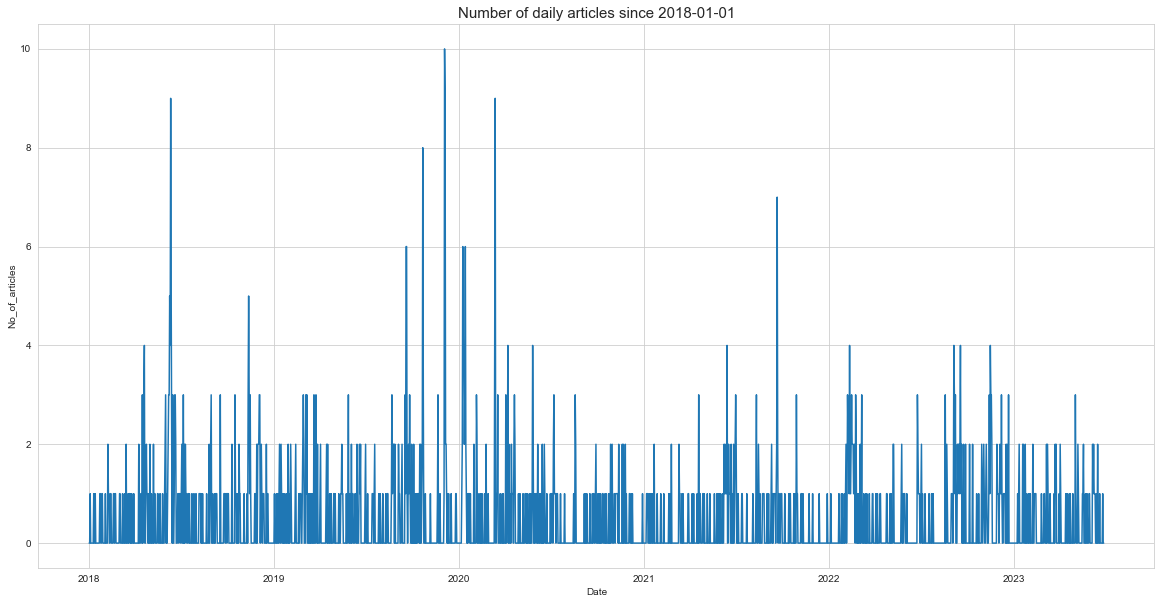

In [141]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.lineplot(data=df1_date, x='Date', y='No_of_articles', ax=ax)
plt.title("Number of daily articles since 2018-01-01", fontsize=15)

Evolution of number of articles over this timeframe at daily level is extremely granular, so let's aggregate the data on Yearly level.

Text(0.5, 1.0, 'Evolution of number of articles published from 2018 to 2023')

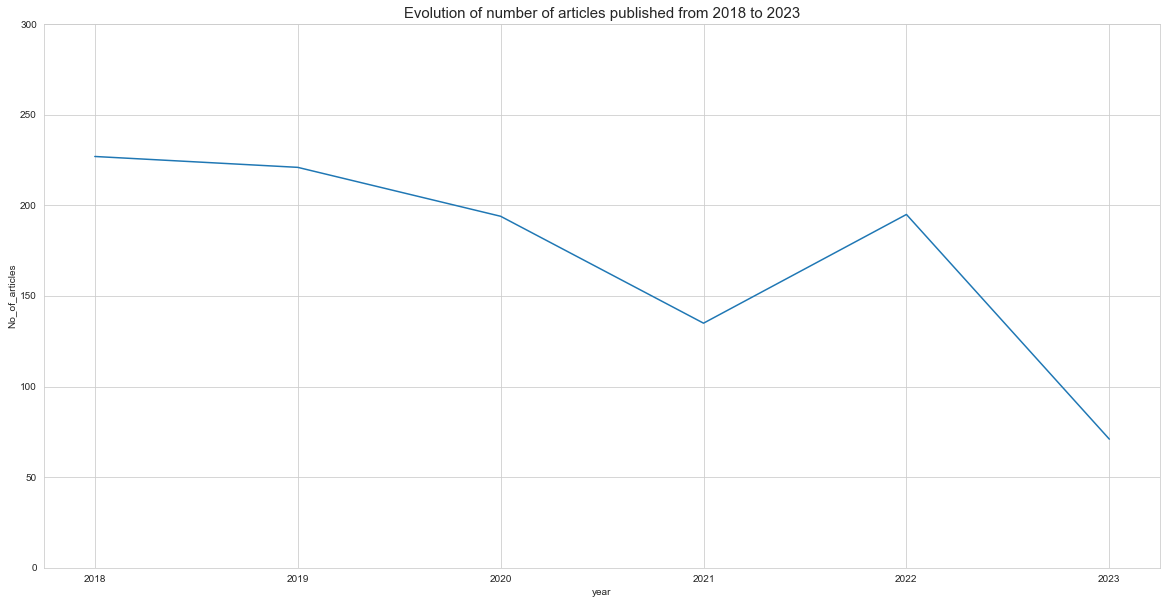

In [242]:
df3 = pd.DataFrame(df.groupby("year")["contentId"].count())
df3.reset_index(drop=False, inplace=True)
df3.rename(columns={'contentId':'No_of_articles'}, inplace=True)
df3.sort_values(by=['year'], inplace=True)

fig, ax = plt.subplots(figsize=(20,10)) 
plt.ylim((0, 300))
sns.lineplot(data=df3, x='year', y='No_of_articles', ax=ax)
plt.title("Evolution of number of articles published from 2018 to 2023", fontsize=15)

In [124]:
df3

,year,No_of_articles
0,2018,227
1,2019,221
2,2020,194
3,2021,135
4,2022,195
5,2023,71


The number of published articles show decreasing trend from 2018 till today. 
The number of articles published were highest in year 2018 followed by continuous decline till 2021.In the first six months of 2023, 71 articles are published.

-------------------------------------------------------------------------------------

#### Question 6: Are there any unusual events in the time series under investigation?
#### Question 7: If so, show these. Why are these unusual? (Define for yourself what you want to show by ordinary or unusual).

To answer these both question together, let's take a look at the number of articles aggregated by Year and Month.

In [220]:
df3 = pd.DataFrame(df.groupby(["year","monthName"])["contentId"].count())
df3.reset_index(drop=False, inplace=True)
df3.rename(columns={'contentId':'No_of_articles'}, inplace=True)
df3["Month-Year"] = df3["monthName"]+"-"+df3["year"].astype(str)
df3.sort_values(by=["No_of_articles"], ascending=False, inplace=True)
df3

,year,monthName,No_of_articles,Month-Year
6,2018,June,55,June-2018
51,2022,February,41,February-2022
28,2020,January,38,January-2020
59,2022,September,36,September-2022
23,2019,September,34,September-2019
...,...,...,...,...
44,2021,May,6,May-2021
45,2021,November,5,November-2021
26,2020,December,5,December-2020
52,2022,January,4,January-2022


Text(0.5, 1.0, 'Number of monthly articles published since January 2018')

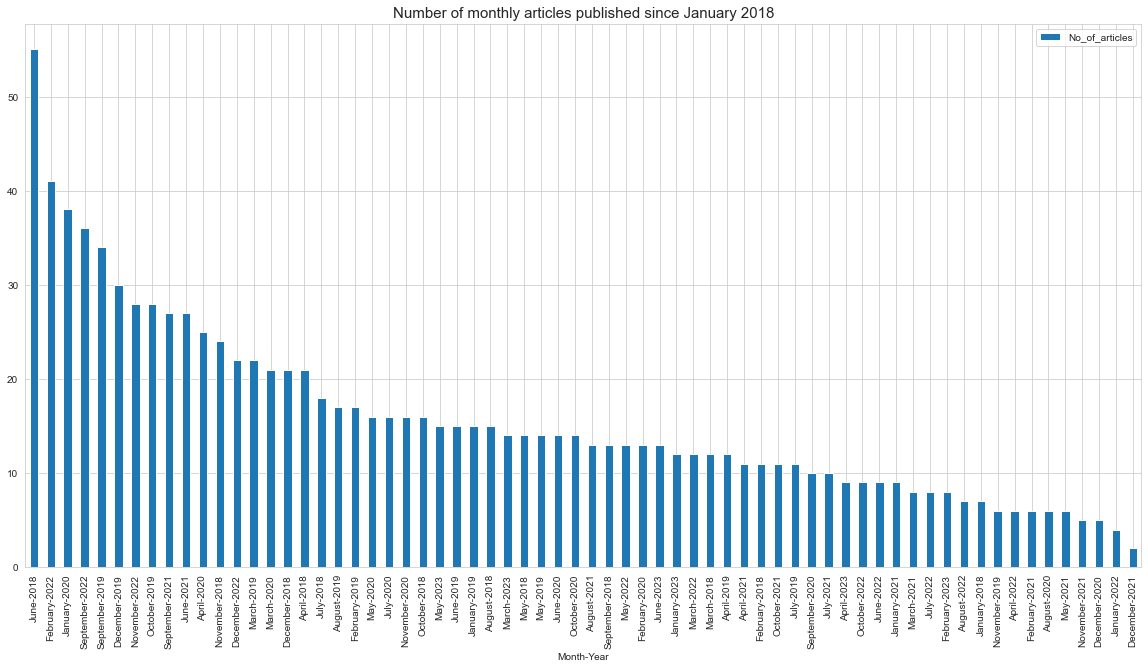

In [221]:
df3.plot.bar(x='Month-Year', y='No_of_articles', figsize=(20,10))
plt.title("Number of monthly articles published since January 2018", fontsize=15)

As we learned in the Question 2, on an average 1 article is published in every 2 days. So average 15 articles are published every month. However, in the above chart we can see that there are several months where the number of articles published are significantly more than 15.



Let's also check the number of articles aggregated at daily level.

In [159]:
df1_date.describe()

,No_of_articles
count,2005.000000
mean,0.520200
std,0.954669
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


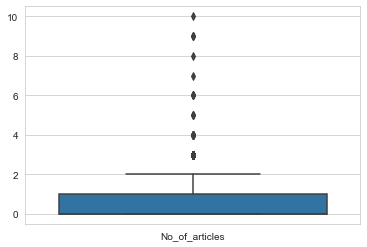

In [160]:
sns.boxplot(df1_date)

Above boxplot clearly shows there are a few outliers in the dataset.

let's extract them using IQR method.

In [224]:
q1 = np.quantile(df1_date["No_of_articles"], 0.25)
q3 = np.quantile(df1_date["No_of_articles"], 0.75)
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

1.0 2.5 -1.5


**Answer 6**: Yes, there are unusual events in the time series under investigation

**Answer 7**: For this case study, I define


- Ordinary: 2 or less articles published each day


- Unuasual: More than 2 article published each day

Following dataframe **outliers** contains all the dates where unusual events occurred.

    


In [225]:
outliers = df1_date[(df1_date["No_of_articles"] <= lower_bound) | (df1_date["No_of_articles"] >= upper_bound)]
outliers

,Date,No_of_articles
105,2018-04-16,3
108,2018-04-19,3
109,2018-04-20,4
151,2018-06-01,3
157,2018-06-07,3
...,...,...
1781,2022-11-17,3
1782,2022-11-18,3
1802,2022-12-08,3
1816,2022-12-22,3


In [232]:
outliers[outliers["No_of_articles"]==3].shape

(53, 2)

In [233]:
outliers[outliers["No_of_articles"]==4].shape

(12, 2)

There are total 78 outliers out of which on 53 days 3 articles/day were published and on 12 days 4 articles/day were published.

-----------------------------------------------------------------------------------------------

#### Question 8: Based on question one. Show the cause of the unusual event.

So to investigate this further let's get all the data available for the dates available in the above *outliers* dataframe

In [234]:
df_unusual = df[df["Date"].isin(outliers["Date"].tolist())]
df_unusual

,contentId,contentType,sectionId,sectionName,webPublicationDate,pillarId,pillarName,headline,byline,wordcount,...,legallySensitive,isPremoderated,isLive,showAffiliateLinks,year,month,day,Date,hour,monthName
5,world/2023/may/03/michael-chong-justin-trudeau...,article,world,World news,2023-05-03 18:59:04+00:00,pillar/news,News,Canadian lawmaker says China targeted his fami...,Leyland Cecco in Toronto,548,...,false,false,true,false,2023,5,3,2023-05-03,18,May
19,world/2022/nov/16/xi-trudeau-canada-china-g20,article,world,World news,2022-11-17 00:58:09+00:00,pillar/news,News,Xi angrily rebukes Trudeau over ‘leaks’ to med...,Leyland Cecco in Toronto,571,...,false,false,true,false,2022,11,17,2022-11-17,0,November
22,world/2022/nov/14/canada-china-espionage-hydro...,article,world,World news,2022-11-14 22:54:58+00:00,pillar/news,News,Canada charges electric vehicle battery resear...,Leyland Cecco in Toronto,545,...,false,false,true,false,2022,11,14,2022-11-14,22,November
28,world/2022/dec/08/sovereignty-act-passed-alber...,article,world,World news,2022-12-08 16:53:29+00:00,pillar/news,News,Alberta ‘sovereignty act’ sets province on col...,Leyland Cecco in Toronto,533,...,false,false,true,false,2022,12,8,2022-12-08,16,December
29,environment/2022/dec/08/cop15-trudeau-pledges-...,article,environment,Environment,2022-12-08 12:15:00+00:00,pillar/news,News,Cop15: Trudeau pledges £510m for Indigenous-le...,Patrick Greenfield and Phoebe Weston in Montre...,848,...,false,false,true,false,2022,12,8,2022-12-08,12,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,world/2018/jun/20/canada-legalises-cannabis-se...,article,world,World news,2018-06-20 00:11:32+00:00,pillar/news,News,Canada becomes second country to legalise cann...,Ashifa Kassam in Toronto,654,...,false,false,true,None,2018,6,20,2018-06-20,0,June
1290,australia-news/commentisfree/2018/jun/19/are-t...,article,australia-news,Australia news,2018-06-19 02:00:05+00:00,pillar/news,News,Are Trump's shenanigans turning us off interna...,Peter Lewis,628,...,false,false,true,None,2018,6,19,2018-06-19,2,June
1298,commentisfree/2018/jun/01/rajoy-pedro-sanchez-...,article,commentisfree,Opinion,2018-06-01 15:34:35+00:00,pillar/opinion,Opinion,Rajoy is gone. Can Pedro Sánchez tackle the co...,Giles Tremlett,830,...,false,false,true,None,2018,6,1,2018-06-01,15,June
1310,world/commentisfree/2018/jun/09/milk-canada-us...,article,world,World news,2018-06-09 11:00:20+00:00,pillar/news,News,Why Canadian milk infuriates Donald Trump,John Barber,1013,...,false,false,true,None,2018,6,9,2018-06-09,11,June


In [235]:
# Check if above query worked correctly
# If the length is same as number of outliers -  then above query worked correctly
df_unusual.groupby("Date")["contentId"].count()

Date
2018-04-16    3
2018-04-19    3
2018-04-20    4
2018-06-01    3
2018-06-07    3
             ..
2022-11-17    3
2022-11-18    3
2022-12-08    3
2022-12-22    3
2023-05-03    3
Name: contentId, Length: 78, dtype: int64

Let's analyse headlines of all these articles

In [240]:
df_unusual.headline.tolist()

['Canadian lawmaker says China targeted his family for harassment',
 'Xi angrily rebukes Trudeau over ‘leaks’ to media about Canada-China relations',
 'Canada charges electric vehicle battery researcher with espionage for China',
 'Alberta ‘sovereignty act’ sets province on collision course with Justin Trudeau',
 'Cop15: Trudeau pledges £510m for Indigenous-led conservation projects',
 'Afternoon Update: mining industry’s windfall tax threat; Victoria’s messy politics; and a Christmas gift guide',
 '‘Canada is in mourning,’ says Justin Trudeau after death of Queen',
 'Trudeau nominates Indigenous woman to Canada’s supreme court',
 'Canada to review ‘disconcerting’ police radio deal with ties to China, says Trudeau',
 'Drama, dismay, triumph: nailbiting climax to the world’s biodiversity deal ',
 'Sunak burnishes image on world stage – but at home problems mount ',
 'King’s coronation: who’s on the guest list and who isn’t (and why)',
 'Morning Mail: senior Queensland cop accused of rac

In [236]:
allheadlines = df["headline"].tolist()
headline_words = []
for headline in allheadlines:
    headline_words.extend(headline.split(" "))

len(headline_words)

11692

Let's remove the stop words such as 'a', 'an', 'the', 'this', 'that' from the list *headline_words*

In [237]:
# Get all the stopwords from Natural Language toolkit
# Stopwords are words that are very common in human language but are generally not useful because they represent
# particularly common words such as “the”, “of”, and “to”.
# We remove these words from list of headline words
allstopwords = set(stopwords.words('english'))
headline_words_f = [word for word in headline_words if word not in allstopwords]
len(headline_words_f)

8854

Get frequency of each word in the list

In [202]:
df_words = pd.DataFrame(pd.Series(headline_words_f).value_counts())
df_words.reset_index(drop=False, inplace=True)
df_words.rename(columns={"index":"words", 0:"occurrences"}, inplace=True)
df_words

,words,occurrences
0,Canada,169
1,Trudeau,131
2,US,91
3,Trump,86
4,Justin,60
...,...,...
4209,negotiator,1
4210,stake,1
4211,Lammy,1
4212,‘Heartbreaking’:,1


In [239]:
# Check the words which occurred in the headlines in df_unusual more than 20 times
df_words[df_words.occurrences>20]

,words,occurrences
0,Canada,169
1,Trudeau,131
2,US,91
3,Trump,86
4,Justin,60
5,says,56
6,briefing:,55
7,Canadian,45
8,–,43
9,The,40


#### Answer 8

The headlines from df_unusual and the words from the above dataframe suggest that the high number of articles posted on these certain dates can be due to following causes.

- Elections in canada
- Canada's political and trade related issues with US, UK and China
- Canada's environmental situations such as extreme heat wave
- G7 summit

However, to get more insights into the exact cause of these unsual events we can analyse the actual content of these articles.

-----------------------------------------------------------------------------

#### Thank you!